In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 一、分布分析




In [3]:
# 1.生鱼片销售情况
data = pd.read_excel('../数据探索/实验数据/catering_fish_congee.xls',header = None,index_col=0)
data.head()

,1
0,
2014-04-01,420
2014-04-02,900
2014-04-03,1290
2014-04-04,420
2014-04-05,1710


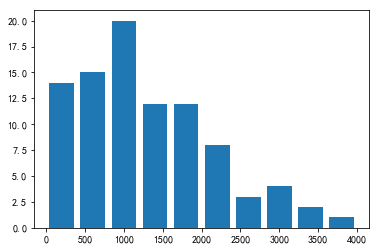

In [4]:
bins = np.arange(0,4001,400)
p = plt.hist(data.values,bins,rwidth=0.8)

In [5]:
# 2.查看学生成绩是否符合正态分布
data = pd.read_excel('../数据探索/实验数据/在线考试成绩.xls',header=0,index_col=0)
bins = np.arange(0,101,10)
data.head()

,平时成绩,末考成绩
用户名,,
1,74,77
2,95,80
3,93,69
4,76,67
5,91,79


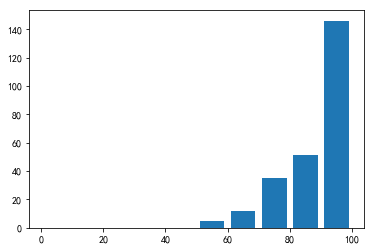

In [6]:
p = plt.hist(data['平时成绩'],bins,rwidth=0.8)

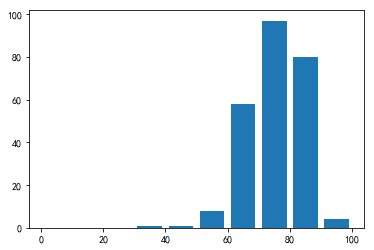

In [7]:
p = plt.hist(data['末考成绩'],bins,rwidth=0.8)

In [8]:
# 二、对比分析




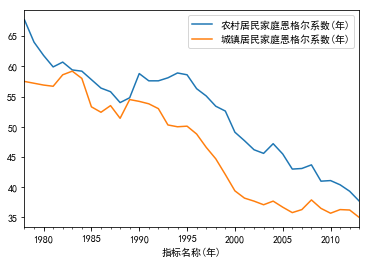

In [9]:
# 1.结构相对数(绝对小于1)

#恩格尔系数
data = pd.read_excel('../数据探索/实验数据/我国恩格尔系数至2014.xls',header=0,index_col=0)
data.plot()
plt.show()

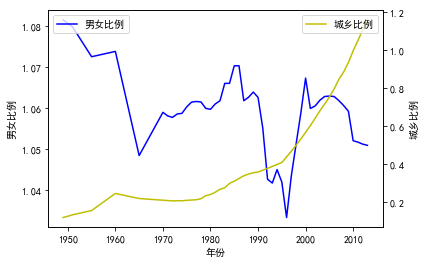

In [10]:
# 2.比例相对数(可以大于1)
#人口占比
data = pd.read_excel('../数据探索/实验数据/人口比重统计.xls',header=0,index_col=0)

data['男女比例'] = data['人口数(男)']/data['人口数(女)']
data['城乡比例'] = data['人口数(城镇)']/data['人口数(乡村)']

fig,ax1=plt.subplots()

ax1.plot(data['男女比例'],color='b',label='男女比例')
ax1.set_xlabel('年份')
ax1.set_ylabel('男女比例')
ax1.legend(loc='upper left')

ax2=ax1.twinx()
ax2.plot(data['城乡比例'],color='y',label='城乡比例')
ax2.set_ylabel('城乡比例')
ax2.legend(loc='upper right')

plt.show()

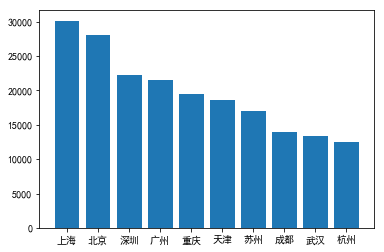

In [11]:
# 3.比较相对数

#中国GDP前十省市
data = pd.read_excel('../数据探索/实验数据/中国城市GDP.xls',header=0,index_col=0)
data10 = data.head(10)
plt.bar(data10['城市'],data10['GDP(亿元)'])
plt.show()

In [12]:
#中国各省市房价数据统计
data = pd.read_excel('../数据探索/实验数据/中国房地产统计数据.xls')
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)

plt.figure(figsize=(20,15),dpi=80)
plt.bar(data['省份'],data['2014'])
plt.xticks(data['省份'],data['省份'])
plt.title("2014年不同省份的房价")
plt.show()

NameError: name 'FontProperties' is not defined

In [ ]:
# 4.强度相对数与动态相对数
# 人均粮食与人均GDP
data = pd.read_excel('../数据探索/实验数据/人均GDP粮食数据.xls',header=0,index_col=0)

data['人均粮食（公斤）'] = (data['粮食总产（万吨）']/data['人口总数（万）'])*2000
data['人均GDP'] = (data['年国内生产总值（GDP) 亿人民币元']/data['人口总数（万）'])*10000

fig,ax1=plt.subplots()

ax1.plot(data['人均粮食（公斤）'],color='b',label='人均粮食（公斤）')
ax1.set_xlabel('年份')
ax1.set_ylabel('人均粮食（公斤）')
ax1.legend(loc='upper left')

ax2=ax1.twinx()
ax2.plot(data['人均GDP'],color='r',label='人均GDP')
ax2.set_ylabel('人均GDP')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# 三、统计量分析




In [13]:
# 1.鞋子码数判断(离散变量计算众数)
data = pd.read_excel('../数据探索/实验数据/鞋码统计表.xlsx',header=0,index_col=0)

# 方法一
counts = np.bincount(data['鞋码'])
print(np.argmax(counts))

# 方法二
from scipy import stats
print(stats.mode(data['鞋码']))
print(stats.mode(data['鞋码'])[0][0])

41
ModeResult(mode=array([41], dtype=int64), count=array([12]))
41


In [14]:
# 2.股票判断，X，Y，Z三只股票遇到牛市，正常市，熊市概率相等，预测那只股票更赚钱
x = [20,10,-5]
y = [25,10,-10]
z = [30,10,-15]

data = pd.DataFrame({'x':x,'y':y,'z':z})
stat = data.describe()
print(stat.loc['std']/stat.loc['mean']) #变异系数,中位数除以平均数算变异系数
print()
print((1+data/100).prod()) #X，Y，Z三只股票赚钱倍数

x    1.509967
y    2.107131
z    2.705550
dtype: float64

x    1.2540
y    1.2375
z    1.2155
dtype: float64


In [15]:
# 四、周期性分析




In [16]:
#某城市气温在一段时间内变化(不写代码)

In [17]:
# 五、贡献度分析




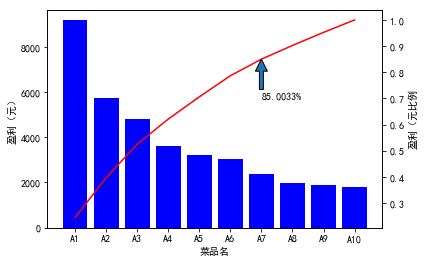

In [18]:
# 帕累托图(二八定律)
data = pd.read_excel('../数据探索/实验数据/catering_dish_profit.xls',header=0,index_col=0)

#简便写法:data['盈利'].cumsum()/sum(data['盈利'])
data['利润占比'] = data['盈利']/sum(data['盈利'])
data['累计占比'] = data['利润占比'].cumsum()


fig,ax1=plt.subplots()

ax1.bar(data['菜品名'],data['盈利'],color='b')
ax1.set_xlabel('菜品名')
ax1.set_ylabel('盈利（元）')

ax2=ax1.twinx()
ax2.plot(data['菜品名'],data['累计占比'],color='r')
ax2.set_ylabel('盈利（元比例')
plt.annotate('85.0033%',xy = (6,0.850033),xytext = (6,0.7),arrowprops={})

plt.show()